<a href="https://colab.research.google.com/github/Adk2001tech/Pothole-Detection-Visualization/blob/master/machine%20learning%20models/Yolov4/Notebook/Yolov4_Pothole_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy 
import gdown

### Dont't Worry to give a TRY!

Just RUN the cells below (sequentially) and all DONE

In [2]:
if not os.path.exists('yolov4'):
        os.makedirs('yolov4')

%cd yolov4

/content/yolov4


In [3]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14621, done.
remote: Total 14621 (delta 0), reused 0 (delta 0), pack-reused 14621
Receiving objects: 100% (14621/14621), 13.19 MiB | 24.17 MiB/s, done.
Resolving deltas: 100% (9951/9951), done.


In [4]:
# 'img_data/' for test images
if not os.path.exists('img_data'):
        os.makedirs('img_data')

# 'backup/' for saving/downloading weights 
if not os.path.exists('backup'):
        os.makedirs('backup')

%cd backup
!gdown --id 1-51oRamI-O2zUdUwIV82EKt_eBgjboc5 
%cd ..

/content/yolov4/backup
Downloading...
From: https://drive.google.com/uc?id=1-51oRamI-O2zUdUwIV82EKt_eBgjboc5
To: /content/yolov4/backup/yolov4-obj_last.weights
256MB [00:03, 78.2MB/s]
/content/yolov4


In [5]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():

  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    name= 'img_data/'+ name
    print(name)
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

To make the model work we need


*   data/obj.data
*   cfg/yolov4-obj.cfg

From [Github](https://github.com/Adk2001tech/Pothole-Detection-Visualization)



In [20]:
%cd ..

/content


In [7]:
# clone my repo
!git clone https://github.com/Adk2001tech/Pothole-Detection-Visualization.git

Cloning into 'Pothole-Detection-Visualization'...
remote: Enumerating objects: 269, done.
remote: Counting objects: 100% (269/269), done.
remote: Compressing objects: 100% (210/210), done.
remote: Total 269 (delta 48), reused 200 (delta 15), pack-reused 0
Receiving objects: 100% (269/269), 1.34 MiB | 13.81 MiB/s, done.
Resolving deltas: 100% (48/48), done.


In [21]:
%cd Pothole-Detection-Visualization

/content/Pothole-Detection-Visualization


In [22]:
import shutil

shutil.copy("machine learning models/Yolov4/obj.data", "../yolov4/darknet/data/obj.data")

shutil.copy("machine learning models/Yolov4/obj.names", "../yolov4/darknet/data/obj.names")

shutil.copy("machine learning models/Yolov4/yolov4-obj.cfg", "../yolov4/darknet/cfg/yolov4-obj.cfg")

'../yolov4/darknet/cfg/yolov4-obj.cfg'

In [23]:
%cd ../yolov4/darknet

/content/yolov4/darknet


In [24]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-obj.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-obj.cfg
%cd ..

/content/yolov4/darknet/cfg
/content/yolov4/darknet


In [16]:
# hide output of cell
%%capture

# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

### Dump test images in */content/yolov4/img_data*

```
!./darknet detector train <path to obj.data> <path to custom config> <yolov4.weights> <image-path> <thresh>
```

In [39]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov4-obj.cfg ../backup/yolov4-obj_last.weights ../img_data/pothole_2.jpg -thresh 0.14

 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   9 route  8 2 	                           ->  208 x 208 x 128 
  10 conv     64       1 x 1/ 1    208 x 208

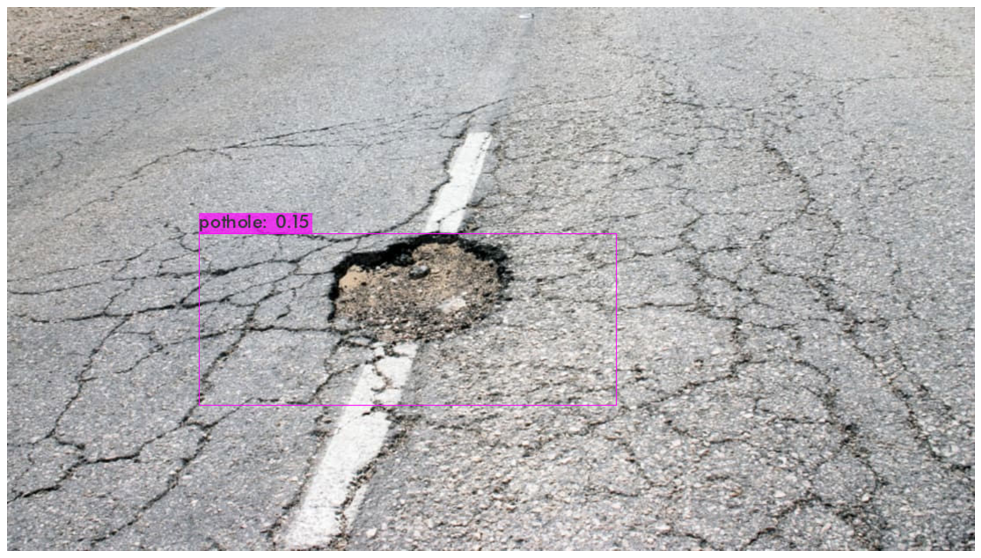

In [40]:
imShow('predictions.jpg')

In [49]:
%%capture
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov4-obj.cfg ../backup/yolov4-obj_last.weights ../img_data/pothole_5.jpg -thresh 0.11

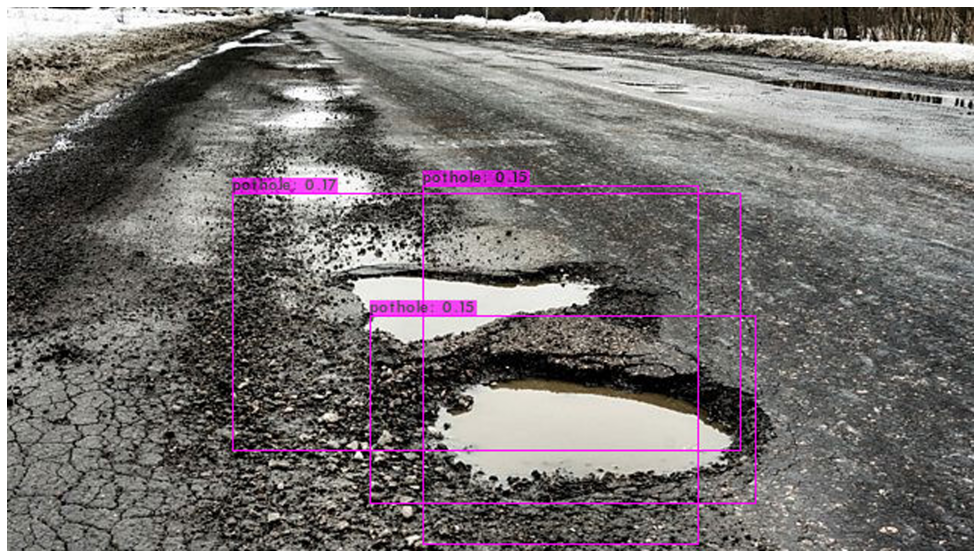

In [50]:
imShow('predictions.jpg')

In [41]:
%%capture
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov4-obj.cfg ../backup/yolov4-obj_last.weights ../img_data/pothole.jpg -thresh 0.11

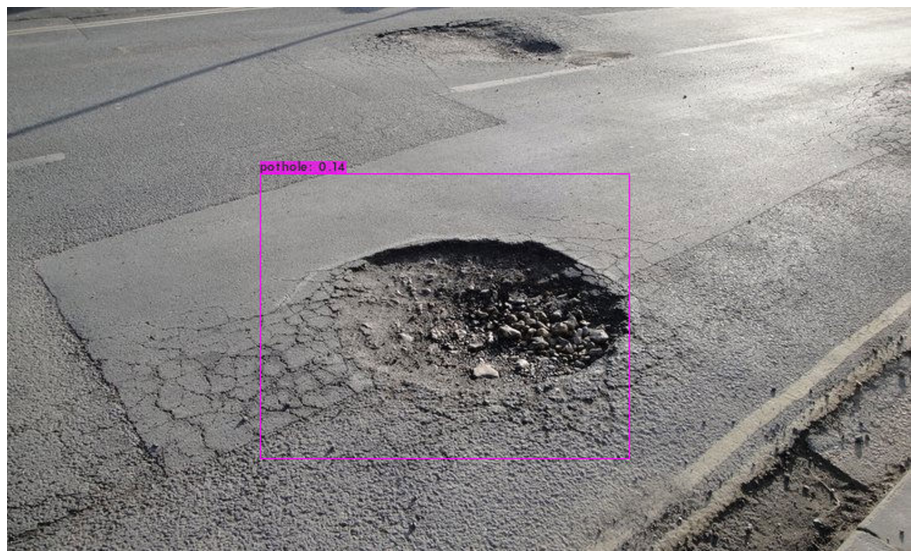

In [42]:
imShow('predictions.jpg')

In [46]:
%%capture
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov4-obj.cfg ../backup/yolov4-obj_last.weights ../img_data/pothole_4.jpg -thresh 0.11

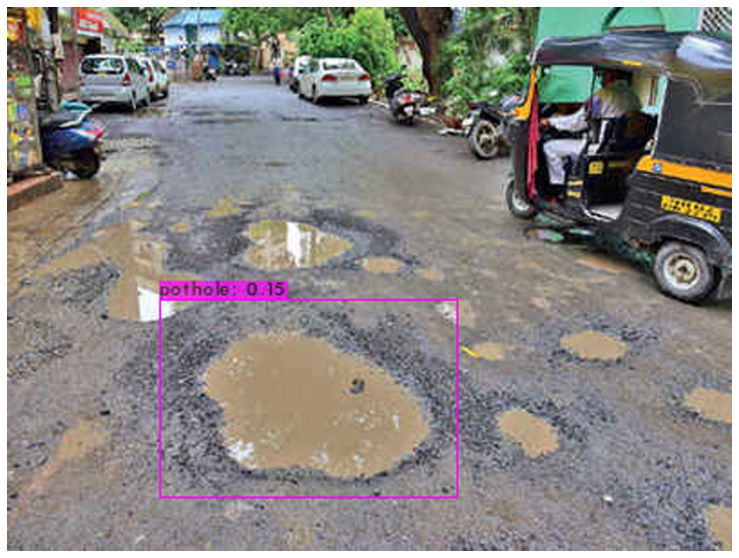

In [47]:
imShow('predictions.jpg')